In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://bit.ly/3HaMAtZ')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Family,Age_scale1
0,0,3,male,22.0,1,0,7.2500,S,Age21_30,2,0.271174
1,1,1,female,38.0,1,0,71.2833,C,Age31_40,2,0.472229
2,1,3,female,26.0,0,0,7.9250,S,Age21_30,1,0.321438
3,1,1,female,35.0,1,0,53.1000,S,Age31_40,2,0.434531
4,0,3,male,35.0,0,0,8.0500,S,Age31_40,1,0.434531


## 1. 시각화

- 히스토그램을 Survived로 나눠 그리기

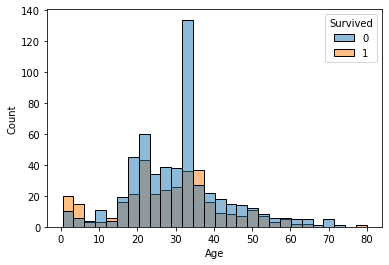

In [3]:
sns.histplot(x='Age', data = titanic, hue = 'Survived')
plt.show()

- kdeplot 그리기
- 두 가지 방법
    - 1. kdeplot(, hue = 'Survived')
        - 생존여부의 비율이 유지된 채로 그려짐.
        - 두 그래프의 아래 면적의 합의 1
    - 2. kdeplot(, hue = 'Survived', common_norm = False)
        - 생존여부 각각 아래 면적의 합이 1인 그래프.
    - 3. kdeplot(, hue = 'Survived', multiple = 'fill')
        - 나이에 따라 생존여부 비율을 비교해볼 수 있음.

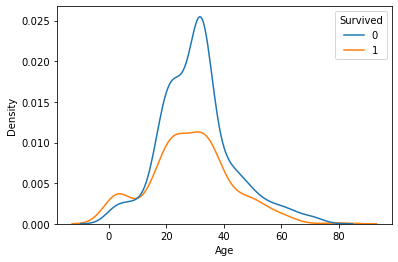

In [4]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived')
plt.show()

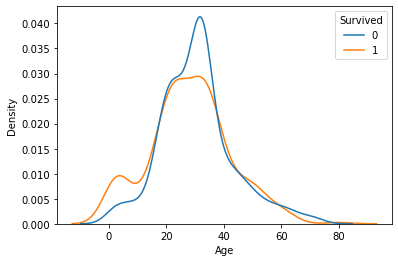

In [5]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived', common_norm = False)
plt.show()

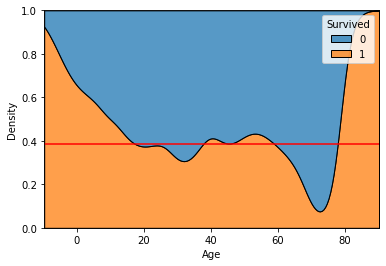

In [6]:
sns.kdeplot(x='Age', data = titanic, hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

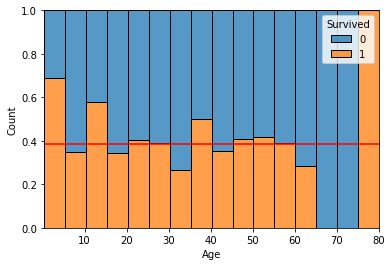

In [7]:
sns.histplot(x='Age', data = titanic, bins = 16
             , hue ='Survived', multiple = 'fill')
plt.axhline(titanic['Survived'].mean(), color = 'r')
plt.show()

## 2. 수치화 : 로지스틱 회귀 모델로부터 p-value 구하기

- 숫자 -> 범주에 대해 딱 맞는 가설검정 도구가 없음.

In [8]:
# 로지스틱 모형을 만들고 통계량을 구하기.
model = sm.Logit(titanic['Survived'], titanic['Age'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.661967
         Iterations 4
Age    3.932980e-13
dtype: float64
